# Taking a look at the DECAY0 files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

## 1. Open file and load content into dataframe

In [2]:
#f = open('test_all_states.dat', "r")
#f = open('test_all_branches_20192308.dat','r')
f = open('test5e4.dat','r')
lines = f.readlines()
f.close()

In [3]:
splitted=[line.split() for line in lines[22:]] # Start at 22nd entry after all text lines in the file
index=0
event=[]
px=[]
py=[]
pz=[]
t=[]
n=[]
ptype=[]
for chunk in splitted:
    
    
    if len(chunk)==5:
        event.append(index)
        n.append(nentries)
        ptype.append(int(chunk[0]))
        px.append(float(chunk[1]))
        py.append(float(chunk[2]))
        pz.append(float(chunk[3]))
        t.append(float(chunk[4]))
    elif len(chunk)==3:
        nentries=int(chunk[2])
        #print(nentries)
        index+=1
        
df=pd.DataFrame()
df['event']=np.asarray(event)
df['n']=np.asarray(n)
df['px']=np.asarray(px)
df['py']=np.asarray(py)
df['pz']=np.asarray(pz)
df['t']=np.asarray(t)
df['ptype']=np.asarray(ptype)
df['ptot']=np.sqrt(np.power(df.px,2)+np.power(df.py,2)+np.power(df.pz,2))
df.head()

,event,n,px,py,pz,t,ptype,ptot
0,1,5,-0.006142,0.016628,0.026840,0.000000e+00,1,0.032165
1,1,5,-0.016250,-0.027643,0.002525,0.000000e+00,1,0.032165
2,1,5,0.946642,0.508665,0.995167,0.000000e+00,1,1.464660
3,1,5,0.167859,0.587333,-0.386363,3.673480e-13,1,0.722781
4,1,5,-0.575412,0.054495,-0.170913,4.514200e-12,1,0.602727


## 2. What about events with more than 5 entries?

Those are events with a conversion electron (ptype = 3). These do not yet have the correct angular correlation. However, they make up less than 1 % of all events in a sample of 10000 events. So it might be overkill to also include the correct $\gamma$-$e^-$ correlation.

In [4]:
df_sub=df[df.n>=6]
print('Number of events containing a conversion electron:', len(np.unique(df_sub.event)))
print('Fraction of events containing a conversion electron:', len(np.unique(df_sub.event))/len(np.unique(df.event))*100,'%')

df_sub.head(30)


Number of events containing a conversion electron: 257
Fraction of events containing a conversion electron: 0.514 %


,event,n,px,py,pz,t,ptype,ptot
1209,263,6,0.018608,-0.026135,0.002299,0.000000e+00,1,0.032165
1210,263,6,-0.002601,0.011450,-0.029945,0.000000e+00,1,0.032165
1211,263,6,-0.143858,-1.318100,-0.622217,0.000000e+00,1,1.464663
1212,263,6,0.112712,-0.491003,-0.518291,6.172340e-12,1,0.722782
1213,263,6,0.682316,-0.621357,0.240426,1.381270e-11,3,0.953648
1214,263,6,-0.017051,0.005502,-0.026272,0.000000e+00,1,0.031800
1520,330,6,0.001550,-0.012691,-0.029515,0.000000e+00,1,0.032165
1521,330,6,0.012412,0.024466,0.016792,0.000000e+00,1,0.032165
1522,330,6,0.480931,0.577319,-0.012677,0.000000e+00,1,0.751500
1523,330,6,1.288170,0.509929,-0.381122,4.572590e-13,1,1.436894


## 3. Check out angular correlations

In [5]:
def vangle(v1,v2):
    'Returns cos(theta) of the angle theta between two vectors.'
    enumerator=np.sum(np.multiply(v1,v2))
    denominator=np.multiply(np.sqrt(np.sum(np.power(v1,2))),np.sqrt(np.sum(np.power(v2,2))))
    costheta=enumerator/denominator
    return costheta

def wtheta(a2,a4,costheta):
    return np.add(1+(a2/2)*(3*np.power(costheta,2)-1),(a4/8)*(35*np.power(costheta,4)-30*np.power(costheta,2)+3))

In [6]:
print(vangle((1,0,0),(1,0,0)))
print(vangle((0,1,0),(1,0,0)))

1.0
0.0


### 3.1 Transitions with two $\gamma$-rays (0+ $\rightarrow$ 2+ $\rightarrow$ 0+)

In [7]:
df020=df[df.n==4]
df020.head()

,event,n,px,py,pz,t,ptype,ptot
5,2,4,0.017686,0.015753,0.021763,0.000000e+00,1,0.032165
6,2,4,-0.017208,0.021115,-0.017106,0.000000e+00,1,0.032165
7,2,4,1.999220,-0.022687,0.888781,0.000000e+00,1,2.187996
8,2,4,-0.561456,-0.105458,0.192162,1.422340e-11,1,0.602728
19,5,4,0.018848,-0.025867,-0.003199,0.000000e+00,1,0.032165


In [8]:
#df020 = df020.groupby('event')
#df_test=df020.agg({'px': lambda x: x.iloc[-2]})
#df_test

In [9]:
angles=[]
for i in tqdm_notebook(df020.event):
    dftemp=df020[df.event==i]
    p1=(dftemp.iloc[-2]['px'], dftemp.iloc[-2]['py'], dftemp.iloc[-2]['pz'])
    p2=(dftemp.iloc[-1]['px'], dftemp.iloc[-1]['py'], dftemp.iloc[-1]['pz'])
    angles.append(vangle(p1,p2))

/home/c_witt19/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


/home/c_witt19/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


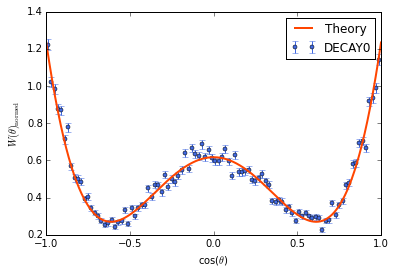

In [10]:
#Correlation formula normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.3571,1.1429,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=100
binwidth=2/nbins
counts, edges = np.histogram(angles,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.legend()
plt.xlim(-1,1)
plt.show()

### 3.2 Transitions with three $\gamma$-rays (0+ $\rightarrow$ 2+ $\rightarrow$ 2+ $\rightarrow$ 0+)

#### 3.2.1 The 0+ $\rightarrow$ 2+ $\rightarrow$ 2+ transition with $E_1 = 1465$ keV, $E_2 = 723$ keV  and $\delta_{2+\rightarrow2+} = -3.4$

In [11]:
df0220=df[df.n==5]
df0220.head(10)

,event,n,px,py,pz,t,ptype,ptot
0,1,5,-0.006142,0.016628,0.026840,0.000000e+00,1,0.032165
1,1,5,-0.016250,-0.027643,0.002525,0.000000e+00,1,0.032165
2,1,5,0.946642,0.508665,0.995167,0.000000e+00,1,1.464660
3,1,5,0.167859,0.587333,-0.386363,3.673480e-13,1,0.722781
4,1,5,-0.575412,0.054495,-0.170913,4.514200e-12,1,0.602727
9,3,5,0.027525,0.006809,-0.015185,0.000000e+00,1,0.032165
10,3,5,0.025516,0.010538,-0.016506,0.000000e+00,1,0.032165
11,3,5,-0.073952,-1.446350,0.218730,0.000000e+00,1,1.464664
12,3,5,0.396968,0.108559,-0.594176,1.348480e-12,1,0.722782
13,3,5,-0.470161,-0.197970,-0.320993,1.448980e-11,1,0.602727


In [12]:
angles21=[]
for i in tqdm_notebook(df0220.event):
    dftemp=df0220[df.event==i]
    p1=(dftemp.iloc[-3]['px'], dftemp.iloc[-3]['py'], dftemp.iloc[-3]['pz'])
    p2=(dftemp.iloc[-2]['px'], dftemp.iloc[-2]['py'], dftemp.iloc[-2]['pz'])
    if dftemp.iloc[-3]['ptot']>1.464:
        angles21.append(vangle(p1,p2))

/home/c_witt19/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


/home/c_witt19/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


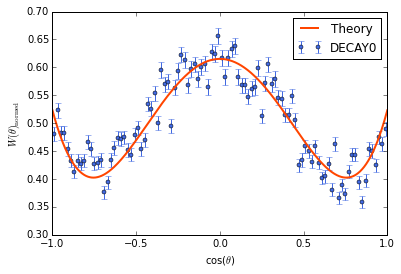

In [ ]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(-0.2487,0.3005,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=100
binwidth=2/nbins
counts, edges = np.histogram(angles21,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()

#### 3.2.2 The 2+ $\rightarrow$ 2+ $\rightarrow$ 0+ transition with $E_2 = 723$ keV, $E_3 = 603$ keV  and $\delta_{2+\rightarrow2+} = -3.4$

In [ ]:
angles22=[]
for i in tqdm_notebook(df0220.event):
    dftemp=df0220[df.event==i]
    p1=(dftemp.iloc[-2]['px'], dftemp.iloc[-2]['py'], dftemp.iloc[-2]['pz'])
    p2=(dftemp.iloc[-1]['px'], dftemp.iloc[-1]['py'], dftemp.iloc[-1]['pz'])
    if dftemp.iloc[-2]['ptot']<0.724:
        angles22.append(vangle(p1,p2))

In [ ]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.1476,0.3005,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=100
binwidth=2/nbins
counts, edges = np.histogram(angles22,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()

#### 3.2.3 The 0+ $\rightarrow$ 2+ $\rightarrow$ 2+ transition with $E_1 = 752$ keV, $E_2 = 1437$ keV  and $\delta = 0.13$

In [ ]:
angles23=[]
for i in tqdm_notebook(df0220.event):
    dftemp=df0220[df.event==i]
    p1=(dftemp.iloc[-3]['px'], dftemp.iloc[-3]['py'], dftemp.iloc[-3]['pz'])
    p2=(dftemp.iloc[-2]['px'], dftemp.iloc[-2]['py'], dftemp.iloc[-2]['pz'])
    if dftemp.iloc[-3]['ptot']<0.753:
        angles23.append(vangle(p1,p2))

In [ ]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.3381,0.0054,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=100
binwidth=2/nbins
counts, edges = np.histogram(angles23,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()

#### 3.2.2 The 2+ $\rightarrow$ 2+ $\rightarrow$ 0+ transition with $E_2 = 1437$ keV, $E_3 = 603$ keV  and $\delta_{2+\rightarrow2+} = 0.13$

In [ ]:
angles24=[]
for i in tqdm_notebook(df0220.event):
    dftemp=df0220[df.event==i]
    p1=(dftemp.iloc[-2]['px'], dftemp.iloc[-2]['py'], dftemp.iloc[-2]['pz'])
    p2=(dftemp.iloc[-1]['px'], dftemp.iloc[-1]['py'], dftemp.iloc[-1]['pz'])
    if dftemp.iloc[-2]['ptot']>0.724:
        angles24.append(vangle(p1,p2))

In [ ]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.1510,0.0054,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=100
binwidth=2/nbins
counts, edges = np.histogram(angles24,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()